<a href="https://colab.research.google.com/github/yoonputer/Team_Project2/blob/master/Deeplearning/test_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import sqlite3
import pandas as pd

In [2]:
! ls ./drive/MyDrive/Forkspoon/dummy1.xlsx

./drive/MyDrive/Forkspoon/dummy1.xlsx


In [3]:
!python -m pip install konlpy

In [4]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  41508      0 --:--:-- --:--:-- --:--:-- 41508


In [5]:
!source ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [6]:
df= pd.read_excel('./drive/MyDrive/Forkspoon/dummy1.xlsx')
df.head(4)

,제목,점수,질문,답변
0,(주)SBS\n\n관심기업,2.0,입사 지원동기를 작성해주세요. (① 지원 부문을 선택한 이유와 ② 지원 부문과 관련...,"\n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ..."
1,한국산업단지공단\n\n관심기업,3.0,"우리 공단에 지원동기와 직무를 선택한 이유, 입사 후 목표와 포부를 기술해 주십시오...","\n""‘재료’를 전공하며 나의 가치를 증명하다""\n 제조업은 우리나라 경제의 주요 ..."
2,(주)오뚜기\n\n관심기업,2.0,"지원직무를 선택한 이유를(직무와 관련한 경험, 전공, 수강과목, 자격증 등을 포함하...","\n""직접 만든다는 것""\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ..."
3,㈜BGF리테일\n\n관심기업,2.0,본인이 선택한 직무에 대해 아래 내용을 포함하여 기술하시오. ①지원한 직무의 역할이...,\n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...


In [7]:
choice_cols= df[['점수','질문','답변']]
choice_cols

,점수,질문,답변
0,2.0,입사 지원동기를 작성해주세요. (① 지원 부문을 선택한 이유와 ② 지원 부문과 관련...,"\n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ..."
1,3.0,"우리 공단에 지원동기와 직무를 선택한 이유, 입사 후 목표와 포부를 기술해 주십시오...","\n""‘재료’를 전공하며 나의 가치를 증명하다""\n 제조업은 우리나라 경제의 주요 ..."
2,2.0,"지원직무를 선택한 이유를(직무와 관련한 경험, 전공, 수강과목, 자격증 등을 포함하...","\n""직접 만든다는 것""\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ..."
3,2.0,본인이 선택한 직무에 대해 아래 내용을 포함하여 기술하시오. ①지원한 직무의 역할이...,\n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...
4,4.0,"본인이 선택한 직무를 담당하고 싶은 이유, 적합성 등에 대해 자유롭게 설명해 보십시...",\n16살에 처음 회계를 접하고 흥미를 느껴 뚜렷한 진로 방향을 형성했습니다.\n기...
...,...,...,...
234,5.0,1지망 직무를 선택한 이유에 대해 기술하시오.(400자),\n[조수역할을 통해 얻은 값진 꿈]\n고등학교를 졸업하기 전 마지막 방학에 아버지...
235,2.0,"귀하에게 `직장`이 가지는 의미는 무엇이며, 그 직장으로서 신용회복위원회를 선택한 ...","\n제게 있어 직장의 의미는 기본적으로는 생계수단인 동시에, 사회적으로 의미 있는 ..."
236,3.0,삼성취업을 선택한 이유와 입사 후 회사에서 이루고 싶은 꿈을 기술하십시오. (700...,\n[자본주의 사회에서의 옳은 길]\n저는 두 가지 이유로 삼성을 선택했습니다. 첫...
237,3.0,1순위로 선택한 역량(팀웍지향)을 발휘한 사례를 경험 중심으로 작성해 주세요.,\n공동의 목표를 위해 역할 분담하여 협동하겠습니다. 아쉬운점 1해양영토대장정에 참...


In [8]:
choice_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   점수      239 non-null    float64
 1   질문      239 non-null    object 
 2   답변      239 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.7+ KB


In [9]:
len(choice_cols)

239

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_data = choice_cols['답변']
y_data = choice_cols['점수']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((179,), (179,), (60,), (60,))

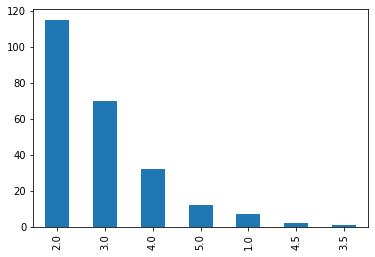

In [13]:
y_data.value_counts().plot(kind='bar')

In [14]:
type(x_train)

pandas.core.series.Series

## NLP 

In [28]:
x_temp = x_train
x_temp= x_temp.str.replace('[^가-힣ㄱ-ㅎ0-9ㅏ-ㅣ]','')
x_temp

221    뚜레쥬르세계화는현재진행형2005년중국에진출한뚜레쥬르는얼마전100호점을개설하면서국내제...
8      우리나라경기를이끄는반도체산업의기초에서일하고싶습니다저는기초산업에매력을느껴컴퓨터응용기계...
207    환경과자동차에대한관심은2016에서순수전기차를공개하였습니다미국등의시장에서는선전할것으로...
209    부서간갈등을우선으로해결해야한다고생각합니다조직에서생활하다보면내생각이옳다고여기는경우가많...
20     모두를위한데이터를쌓아가는직무는현장의소리를데이터화하는역할이라생각합니다점포운영을눈으로보...
                             ...                        
79     학창시절식품공장견학을통해품질관리라는직무에대해알게되었습니다식품의품질관리가까다롭고어렵지...
140    언어는응용프로그래밍에서부터네트워크시스템그래픽프로그래밍등의다양한분야에걸쳐서활용되기때문...
80     강한주인의식대학교총학생회의일원으로활동하며주인의식이라는가치관을통해단체에기여하고저자신만...
120    제품경쟁력은구매직무에서창출전직장무역회사의경험을통해제품경쟁력은구매직무에서나온다는것을깨...
108    고객의숨은니즈를찾고제안하며성취감을얻는영업저는영업직무를통해고객사에더좋은보안솔루션을제안...
Name: 답변, Length: 179, dtype: object

In [29]:
from konlpy.tag import Mecab

In [30]:
mecab= Mecab()

In [31]:
# mecab.pos(x_temp[0])
print(mecab.morphs(x_temp[0]))

['경영', '은', '전사', '의', '콘텐츠', '제작', '에서부터', '유통', '과정', '을', '파악', '하', '고', '설정', '한', '목표', '를', '이루', '기', '위해', '전', '과정', '에서', '의', '문제점', '이나', '비', '효율', '성', '을', '제거', '하', '는', '직무', '임', '을', '알', '고', '있', '습니다', '이', '직무', '를', '수행', '하', '기', '위해서', '는', '상황', '판단력', '과', '문제', '해', '결력', '이', '필수', '역량', '이', '라고', '생각', '합니다', '아쉬운', '점', '1', '한국어', '영어', '일본어', '에', '이르', '는', '언어', '구사력', '과', '빠른', '적응력', '을', '바탕', '으로', '풍부', '한', '사회', '경험', '을', '하', '며', '핵심', '역량', '을', '키웠', '습니다', '와', '에서', '교육', '콘텐츠', '개발', '및', '학생', '응대', '업무', '를', '수행', '하', '면서', '클라이언트', '와', '의', '소통', '을', '통한', '효율', '적', '인', '문제', '해결', '방법', '을', '끊임없이', '모색', '하', '여', '최선', '의', '결과', '를', '도출', '하', '곤', '했', '습니다', '회사부', '대표', '님', '말씀', '에', '따르', '면', '제', '가', '제작', '에', '참여', '한', '교재', '콘텐츠', '나', '상담', '내역', '을', '기록', '한', '일지', '는', '후', '임직원', '들', '에게', '몇', '년', '간본', '보', '기', '처럼', '제시', '되', '고', '있', '다고', '합니다', '아쉬운', '점', '2', '제', '가', '배양', '한', '역량',

In [32]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 